In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from skimage import io

# Task 1

## PCA

In [42]:
df = pd.read_csv('drug200.csv')

In [43]:
# Используется для преобразования категориальных или
# текстовых данных в числа, которые наши предсказательные
# модели понимают лучше.
from sklearn.preprocessing import LabelEncoder


#function to label
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])


#create a list of data needed to be labeled
categories = ['Sex', 'BP', 'Cholesterol', 'Drug']

for label in categories:
    label_encoder(label)

In [44]:
X = df.drop('Drug', axis=1)
Y = df['Drug']

t = StandardScaler()
X_t = t.fit_transform(X)


In [45]:
pca = PCA(n_components=2, svd_solver='full')
x_pca = pca.fit_transform(X_t, )

c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

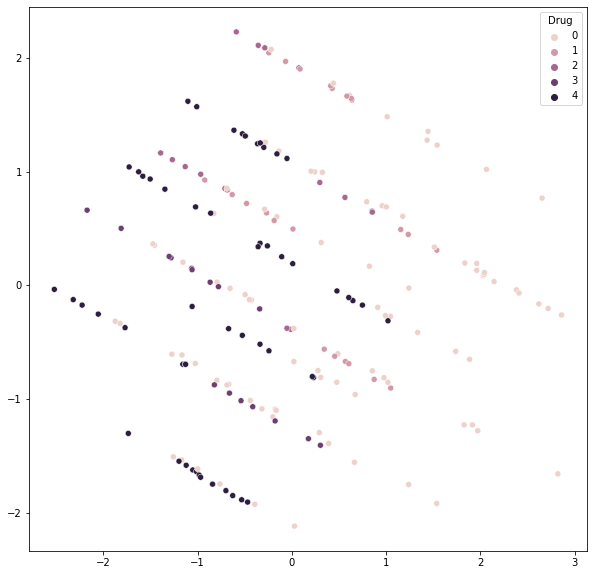

In [46]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x_pca[:, 0], x_pca[:, 1], hue=Y)

In [47]:
pca.explained_variance_

array([1.29836642, 1.0817823 ])

In [48]:
pca.explained_variance_ratio_


array([0.25837492, 0.21527468])

## TSNE

In [49]:
ts = TSNE(n_components=2, init="pca", learning_rate='auto')
x_tsne = ts.fit_transform(X)

c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

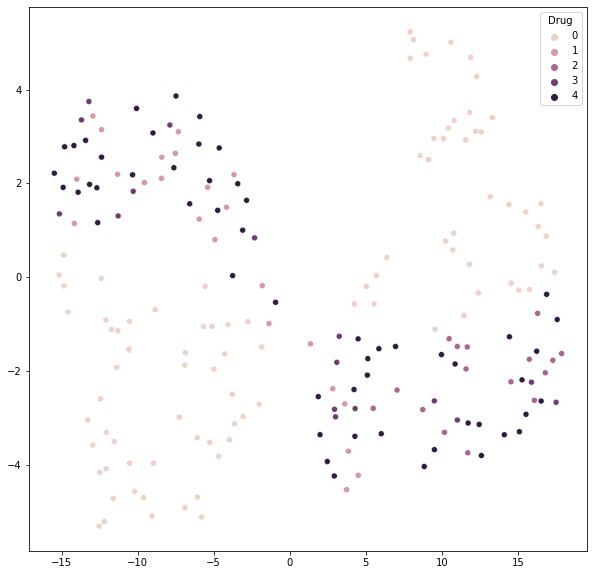

In [50]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x_tsne[:, 0], x_tsne[:, 1], hue=Y)

In [51]:
x_tsne.shape

(200, 2)

# Task 2.1

In [131]:
n_colors = 8

img = io.imread("image.jpg")
print(img.shape)

(518, 960, 3)


In [132]:
# Преобразование в числа с плавающей запятой вместо 8-битного целочисленного
# кодирования по умолчанию. Деление на 55 важно для того, чтобы plt.imshow хорошо
# работал с данными с плавающей запятой (должно быть в диапазоне [0-1]).
#img = np.array(img, dtype=np.float64) / 255


In [133]:
# Загрузите изображение и преобразуйте его в массив 2D numpy.
w, h, d = original_shape = tuple(img.shape)

In [134]:
assert d == 3
image_array = np.reshape(img, (w * h, d))

In [135]:
from sklearn.utils import shuffle

print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

Fitting model on a small sub-sample of the data


In [136]:
from sklearn.metrics import pairwise_distances_argmin

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

In [137]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

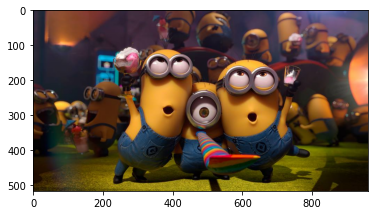

In [59]:
plt.imshow(img)

## 64

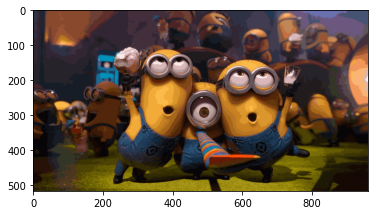

In [114]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 32

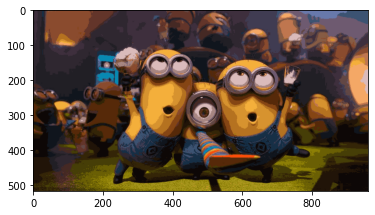

In [122]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 16

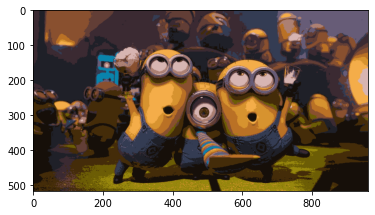

In [130]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 8

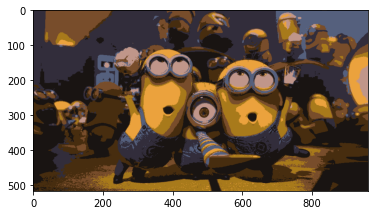

In [138]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 2

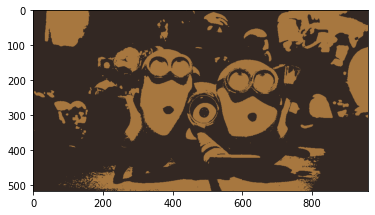

In [64]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# Task 2.2


## Generate Date

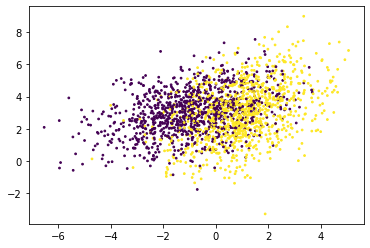

In [65]:
num_points = 1000

mean_1 = [-1, 3]
cov_1 = [[3, 1], [1, 2]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [1, 3]
cov_2 = [[2, 1], [1, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] * num_points)
X, y = shuffle(X, y, random_state=500)
plt.scatter(X[:, 0], X[:, 1], s=3, c=y)

In [66]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

for i in range(2, 5):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.3692412637592944
For n_clusters = 3  silhouette average: 0.3409698462271018
For n_clusters = 4  silhouette average: 0.3352927900347849


In [67]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)

means 
[[ 1.09014674  3.53380464]
 [-1.06761105  2.47135431]]


In [68]:
print('covariances ')
print(GMM.covariances_)

covariances 
[[[1.87006649 0.57122937]
  [0.57122937 2.42298501]]

 [[2.67515343 0.14888505]
  [0.14888505 1.97376311]]]


In [69]:
print("weights")
print(GMM.weights_)

weights
[0.5083133 0.4916867]


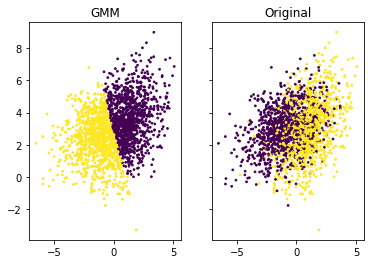

In [70]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y, s=3)

In [71]:
mean_11 = GMM.means_[0]
cov_11 = GMM.covariances_[0]
x_11 = np.random.multivariate_normal(mean_11, cov_11, num_points)
mean_21 = GMM.means_[1]
cov_21 = GMM.covariances_[1]
x_21 = np.random.multivariate_normal(mean_21, cov_21, num_points)
X1 = np.concatenate([x_11, x_21])
y1 = np.array([0] * num_points + [1] * num_points)
X1, y1 = shuffle(X1, y1, random_state=500)

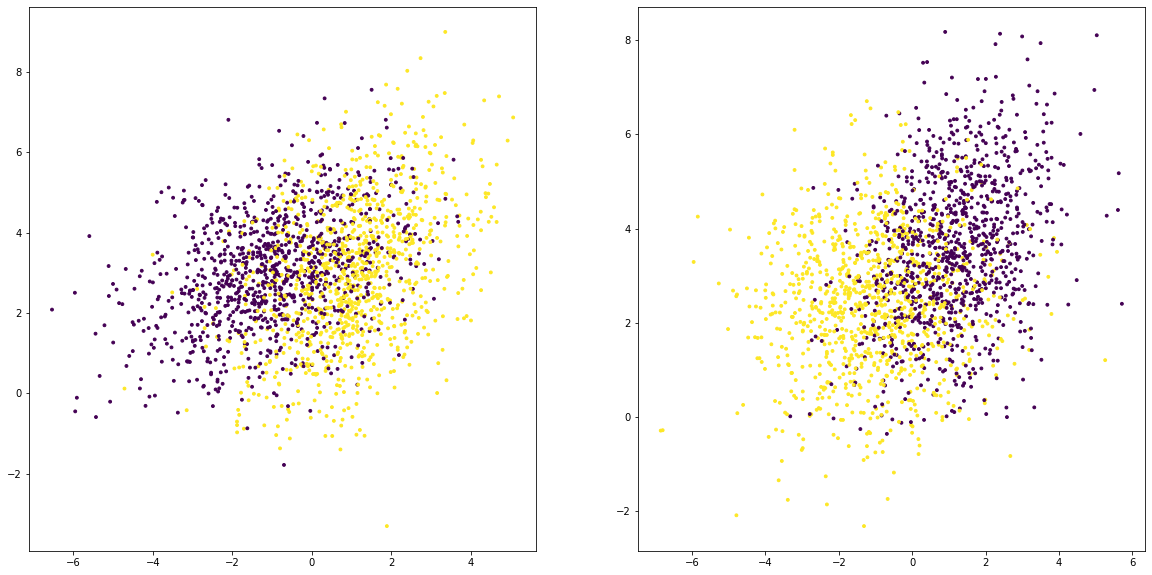

In [72]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=8, c=y)
plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], s=8, c=y1)

# Task 3

In [73]:
df1 = pd.read_csv('datafor3labs.csv')

In [74]:
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [75]:
df1.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [76]:
print(len(df1[df1.label == 0]), 'Non-Hatred Tweets')
print(len(df1[df1.label == 1]), 'Hatred Tweets')

29720 Non-Hatred Tweets
2242 Hatred Tweets


In [77]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
stopWords = stopwords.words('english')
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria

### Предварительная обработка столбца твита

In [79]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [80]:
df1['normalized_text'] = df1.tweet.apply(normalizer)

### Извлечение слов с хэштегом для дальнейшего анализа

In [81]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [82]:
df1['hashtag'] = df1.tweet.apply(extract_hashtag)

In [83]:
df1.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [84]:
#all tweets
all_words = " ".join(df1.normalized_text)
#print(all_words)

In [85]:
#Ненавистные твиты
hatred_words = " ".join(df1[df1['label']==1].normalized_text)
#print(hatred_words)

### Все твиты cloudword

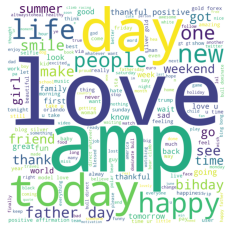

In [86]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Ненавистные твиты cloudword

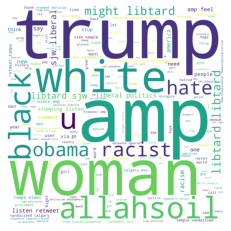

In [87]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Анализ слов

In [88]:
freq_all_hashtag = FreqDist(list((" ".join(df1.hashtag)).split())).most_common(10)
freq_hatred_hashtag = FreqDist(list((" ".join(df1[df1['label']==1]['hashtag'])).split())).most_common(10)


In [89]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])

In [90]:
print(df_allhashtag.head())

      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471


In [91]:
print(df_hatredhashtag.head())

       words  frequency
0      trump        134
1   politics         95
2  allahsoil         92
3    libtard         76
4    liberal         75


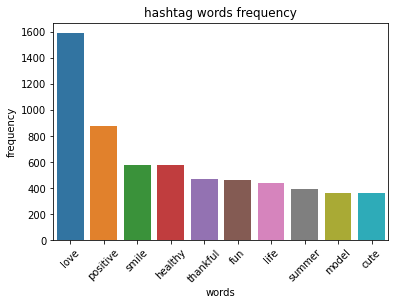

In [92]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

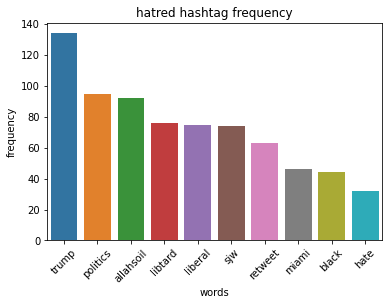

In [93]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

In [94]:
# to create sparse matrix corpus is created to pass to vectorizer
len(df1)
corpus = []
for i in range(0,31962):
    corpus.append(df1['normalized_text'][i])
#print(corpus)

In [95]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)


CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [96]:
# creating dense matrix
X = cv.transform(corpus).toarray()
y = df1.iloc[:,1].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### TfidfVectorizer

In [98]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [99]:
from sklearn.ensemble import RandomForestClassifier

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=42)
#classifier2 = LogisticRegression()
classifier2 =  RandomForestClassifier(n_estimators=200, max_depth=200).fit(X1_train, y1_train.astype(np.int64))

classifier2.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=200, n_estimators=200)

In [100]:
y1_pred = classifier2.predict(X1_test)
y1_prob = classifier2.predict_proba(X1_test)

In [101]:
print(f1_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

0.6291946308724832
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9806
           1       0.83      0.51      0.63       742

    accuracy                           0.96     10548
   macro avg       0.90      0.75      0.80     10548
weighted avg       0.95      0.96      0.95     10548

[[9731   75]
 [ 367  375]]


### LDA

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [103]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [104]:
df2 = df1["hashtag"]

In [105]:
n_components = 5
n_top_words = 10

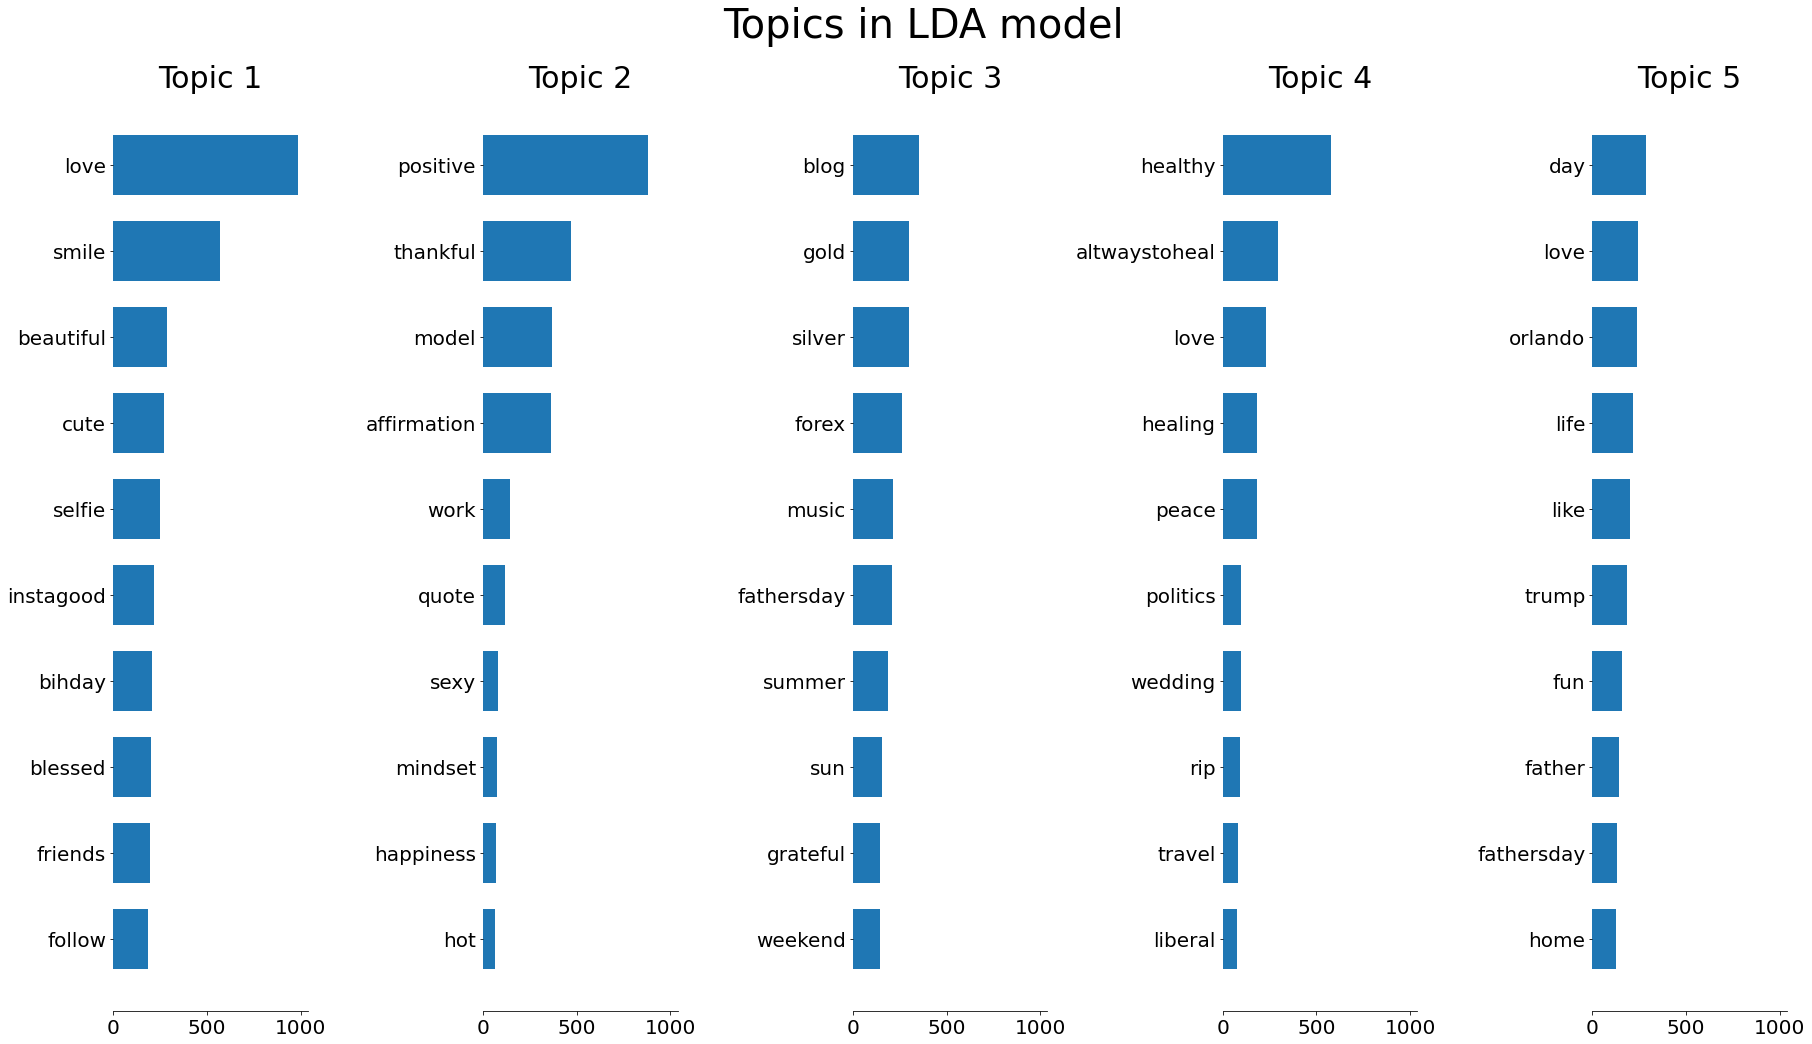

In [106]:
vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(df2)

lda = LatentDirichletAllocation(n_components=n_components, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names_out()

plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')